![](https://user-images.githubusercontent.com/83436724/166116197-cbe1a8bc-e1df-4cac-ad5e-9f6cd9f0f43c.png)

## Obtener datos desde diversas fuentes

#### Obtener datos desde PDF y hacer gráficos
#### Autor: Carlos Adrián Alarcón [LinkedIn](https://www.linkedin.com/in/carlos-adrian-alarcon-delgado/)


Una tipo de archivo muy usado actualmente son los PDF. Muchas veces queremos hacer análisis de texto a partir de data que tenemos en PDF's. Para obtener datos desde esta clase de archivos, vamos a utilizar la librería **pdfplumber** [Ver documentación](https://gitee.com/hailei_yan/pdfplumber#basic-example)

Para instalarla, solamente tenemos que ejecutar el siguiente código `pip install pdfplumber` 

Adicionalmente,utilizaremos la librería **nltk** que es muy usada para procesamiento de lenguaje natural Esta librería nos ayudará a separar las palabras y a quitar las stop words (palabras que no agregan valor) [Ver documentación](https://www.nltk.org/)

In [8]:
### Importamos la libreria
#!pip install pdfplumber
#!pip install nltk
import pdfplumber
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk 
nltk.download('punkt')
nltk.download('stopwords')

### Cargamos el pdf (pueden encontrar el archivo en GitHub)
with pdfplumber.open(r'example.pdf') as pdf:
    total_paginas = len(pdf.pages)
    texto = []
### Este ciclo permitirá obtener todas las palabras de todas las páginas del archivo. Acá usaremos la opción de tokenizar de la librería nltk
    for numero_pagina in range(0,total_paginas):
        pagina = pdf.pages[numero_pagina]
        palabras_pagina = (pagina.extract_text())
        tokens = word_tokenize(palabras_pagina)
        texto.extend(tokens)

### Imprimimos las primeras 30 palabras   
print(texto[:30])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['21', 'Speeches', 'That', 'Shaped', 'Our', 'World', 'The', 'People', 'and', 'Ideas', 'That', 'Changed', 'the', 'Way', 'We', 'Think', 'Chris', 'Abbott', '1', '3', '5', '7', '9', '10', '8', '6', '4', '2', 'First', 'published']


Como podemos observar, ya tenemos las palabras en una lista de Python, sin embargo, todavía hay que hacerles alguna limpieza para quitar signos de puntuación, número, stop words, además de pasar todo a minúsculas. Para eso, vamos a hacer uso de expresiones regulares y diversos ciclos.

In [9]:
### Quitar signos de puntuación y stopwords del idioma inglés
punctuations = ['(',')',';',':','[',']',',','.']
stop_words = stopwords.words('english')
keywords = [word for word in texto if not word in punctuations and not word in stop_words]

### Con esta pseudofunción se convertirá todo a minúsculas
a = (map(lambda x:x.lower(),keywords))
palabras = list(a)

### Imprimimos las primeras 30 palabras
print(palabras[:30])


['21', 'speeches', 'that', 'shaped', 'our', 'world', 'the', 'people', 'ideas', 'that', 'changed', 'way', 'we', 'think', 'chris', 'abbott', '1', '3', '5', '7', '9', '10', '8', '6', '4', '2', 'first', 'published', '2010', 'rider']


Ya hemos quitado los signos de puntuación y todo está en minúscula, pero todavía tenemos números. A continuación, vamos a quitarlos con expresiones regulares

In [10]:
import re
### Generar expresión regular para considerar solo letras
p = re.compile(r'^[a-z]\w+$', re.MULTILINE | re.IGNORECASE)

### Ciclo para quitar los números
limpias = []
for i in palabras:
    valor = re.findall(p, i)
    if len(valor)>= 1:
        limpias.append(valor[0])
### En esta fila, convertimos todas las palabras a una sola cadena
texto_final = ' '.join([str(item) for item in limpias])

### Imprimimos los 30 primeros caracteres
print(texto_final[:30])


speeches that shaped our world


Un gráfico interesante para analizar textos es la nube de palabras o WordCloud. Para generar este tipo de gráficos, vamos a hacer uso de la librería **WordCloud**

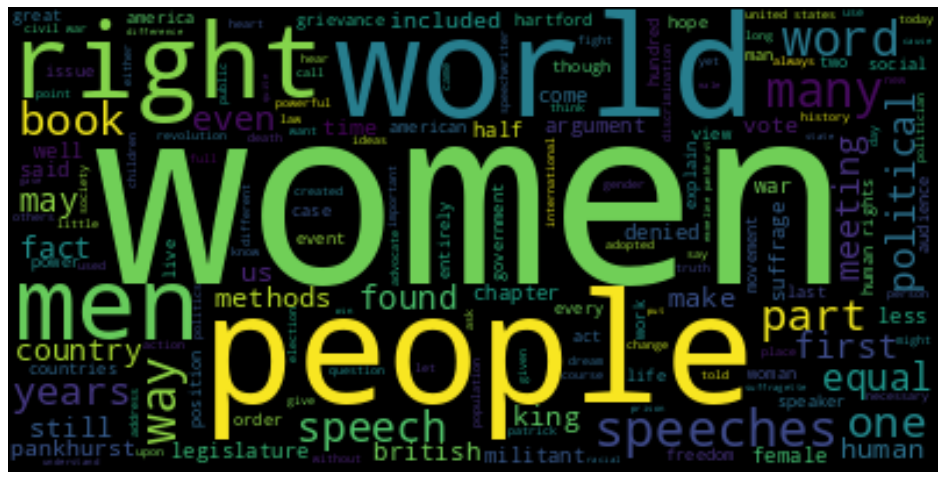

In [11]:
### Importar librería
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure



### Generar gráfico
wordcloud = WordCloud().generate(texto_final)

### Definir tamaño del gráfico
figure(figsize=(15, 12), dpi=80)

### Mostrar el gráfico
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


De la misma manera, exploraremos la frecuencia de las palabras, para determinar exactamente cuántas veces se repiten las palabras en el documento. Para esto, utilizaremos la librería ``pandas`` y el objeto llamado ``dataframe``

In [22]:
import pandas as pd
df_palabras = pd.DataFrame(limpias, columns = ['palabras'])
df_recuento = pd.DataFrame(df_palabras['palabras'].value_counts())
df_recuento = df_recuento.reset_index().rename(columns = {'index':'palabra','palabras':'recuento'})
df_recuento

,palabra,recuento
0,women,86
1,the,38
2,world,37
3,people,36
4,men,32
...,...,...
1835,multiculturalism,1
1836,highly,1
1837,emotive,1
1838,marked,1
